# PROBLEM STATEMENT
A Multinational finance service group with Headquarters in London, Uk, that offers retail and investment banking, pension management, asset management and payment services, wants to build a machine learning model that predicts online payment fraud.  This would help them block leakages in revenue and overall increase their profitabiity.

#### DATA SET DICTIONARY
The column headers of the dataset represents the following:

step: represents a unit of time where 1 step equals 1 hour

type: type of online transaction

amount: the amount of the transaction

nameOrig: customer starting the transaction

oldbalanceOrg: balance before the transaction

newbalanceOrig: balance after the transaction

nameDest: recipient of the transaction

oldbalanceDest: initial balance of recipient before the transaction

newbalanceDest: the new balance of recipient after the transaction

isFraud: fraud transaction

In [2]:
# Importing relevent libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the  dataset
data = pd.read_csv('C:/Users/user/Downloads/Online Payment Fraud Detection.csv')

In [4]:
# viewing the head and tail of the dataset
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


In [5]:
# General information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


A key indicator to look out for in the general information of the dataset is the Non-Null Count which indicates if there are any missing values in the dataset.
Fortunately, the dataset did not contain missing values.

In [6]:
# Statistical description of the dataset
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


The statistical description of the dataset highlights the degree of central tendency and dispersion of the dataset.
The 'isFraud' column hits that the value (1) meaning transactions that are fraudulent predominantly exists in the maximum range of the dataset. However, at this point this is just a tip. Further Exploratory Data Analysis would confirm and expound more trends and patterns. The 'min', 'mean', and 'max' values of the columns also show that for all the columns, the max vaues are not so far from the mean values considering the distance of the min value too. This hints the presence of outliers are minimal, hence excusable.

In [7]:
# Double checking for missing values in the dataset
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

The absence of missing values is confirmed

### Exploratory Data Analysis (EDA)
Performing EDA helps us dig into the data to uncover various trends and underlying patterns in the dataset.

In [8]:
# Exploring correlations between all the columns
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


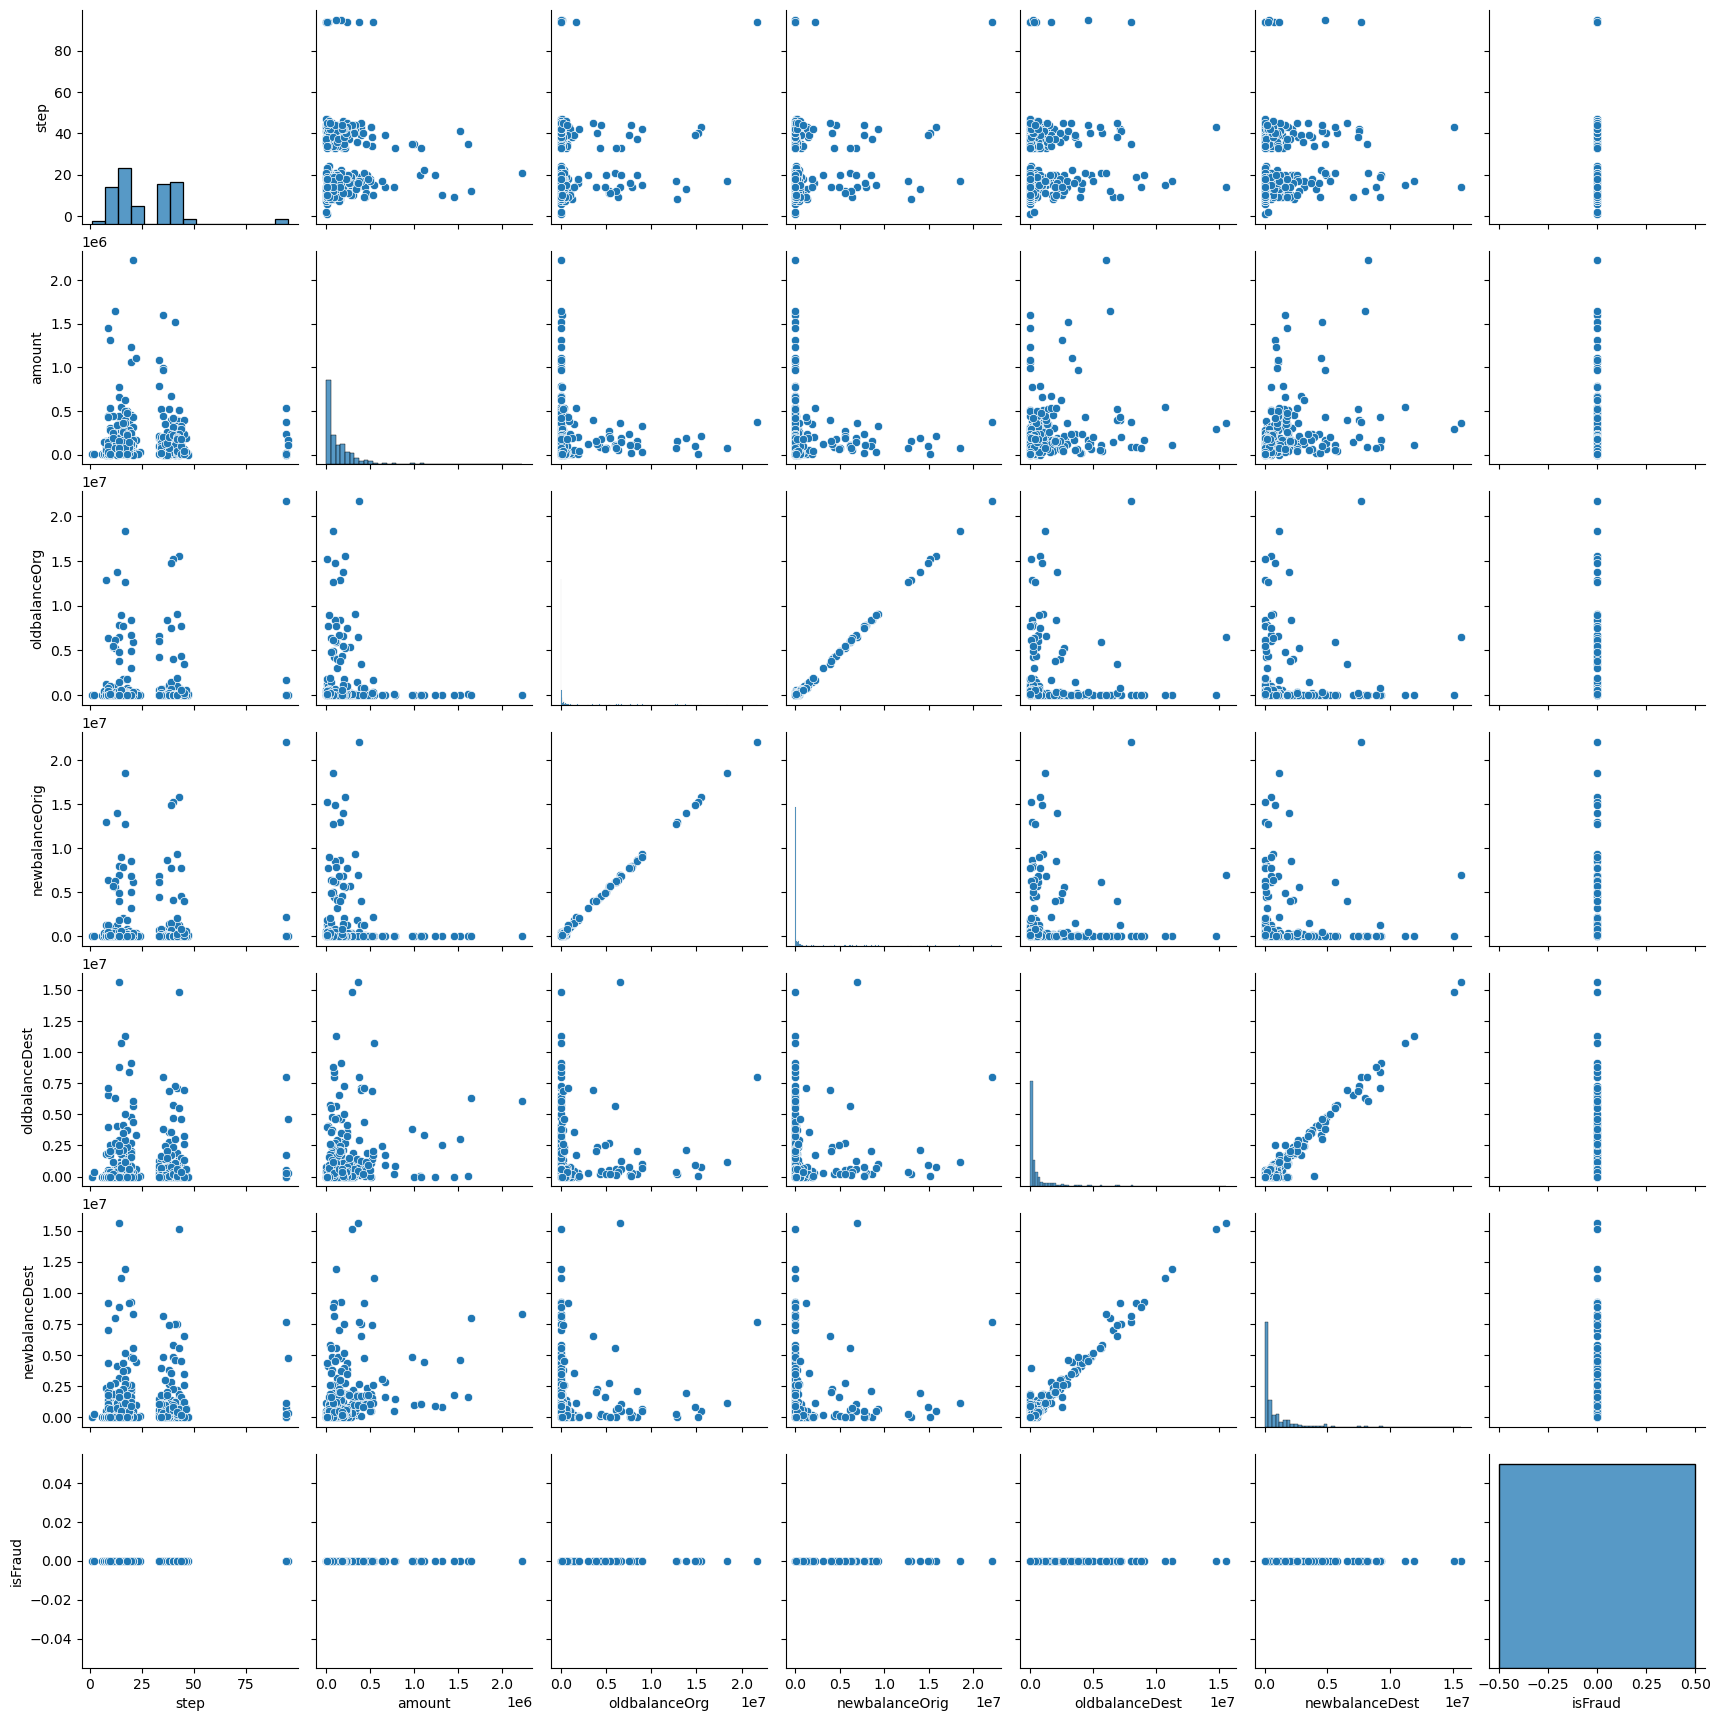

In [9]:
sns.pairplot(data.sample(400))
plt.show()

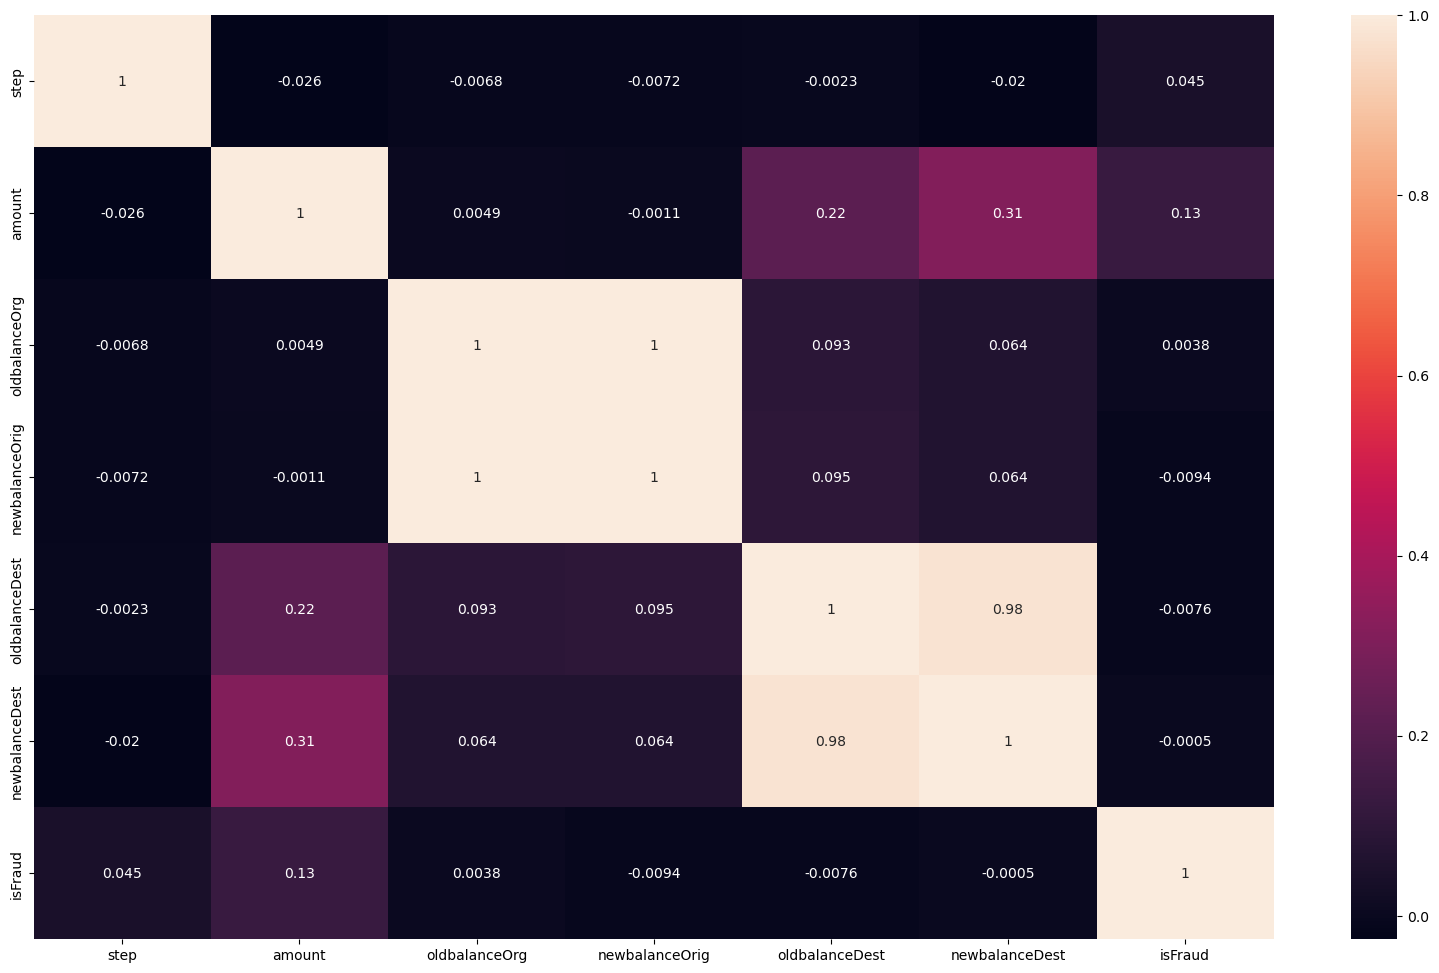

In [10]:
plt.figure(figsize=(20,12))

sns.heatmap(data.corr(),annot=True)
plt.show()

Exploring the correlation plots shows that the feature 'amount' has the strongest correlation to fraud. However, it is noteworthy to consider that these corrlation plots only take numerical variables into consideration, hence the need to keep exploring other visuals to take into account the categorical variables and the story they tell towards the label.

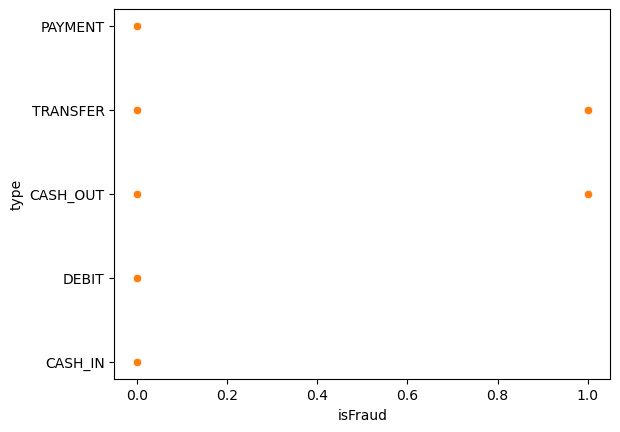

In [12]:
# Visualizing the relationships between the label (isFraud) and the features
sns.scatterplot(x='isFraud',y='type',data=data);
plt.show()

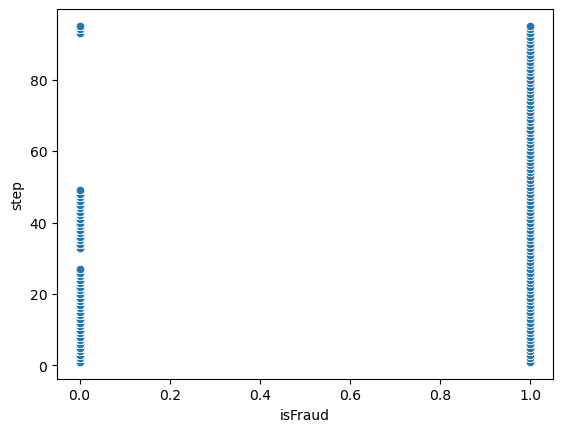

In [13]:
sns.scatterplot(x='isFraud',y='step',data=data);
plt.show()

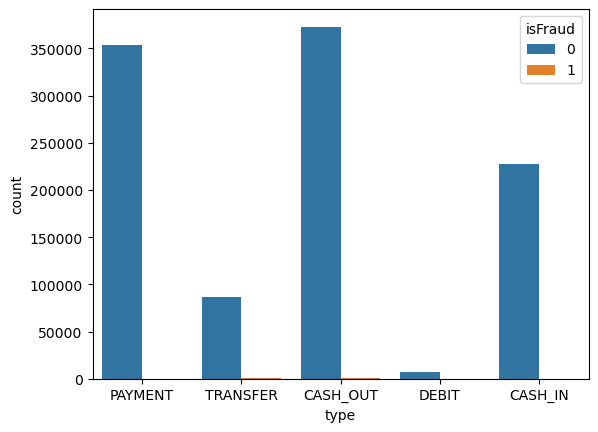

In [14]:
sns.countplot(x='type',hue='isFraud',data = data);
plt.show()

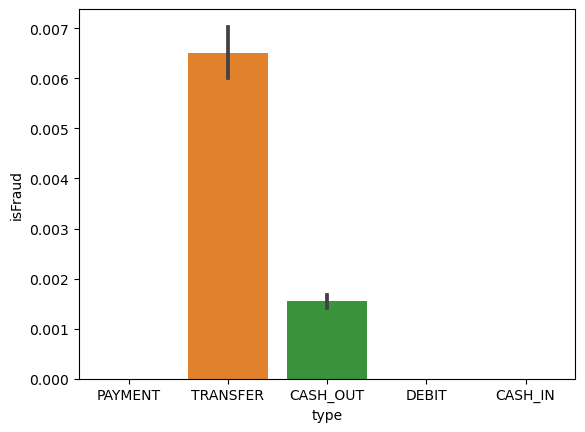

In [16]:
sns.barplot(x=data.type, y=data.isFraud);
plt.show()

### Univariate Analysis

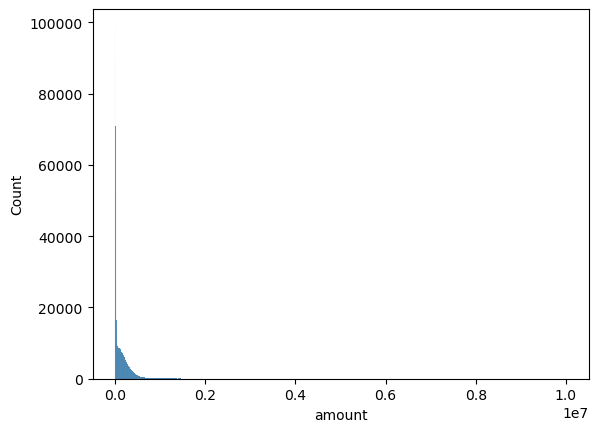

In [17]:
sns.histplot(data['amount']);
plt.show()

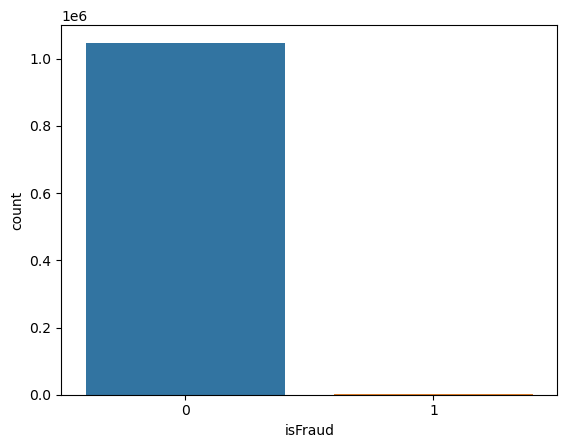

In [18]:
sns.countplot(x='isFraud', data =data);
plt.show()

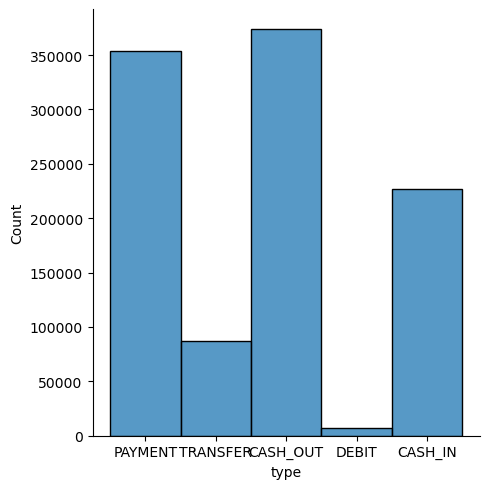

In [19]:
sns.displot(x='type', data =data);
plt.show()

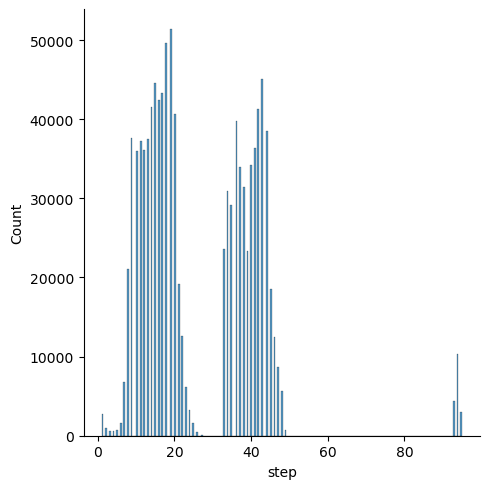

In [20]:
sns.displot(x='step', data =data);
plt.show()

### Multivariate Analysis

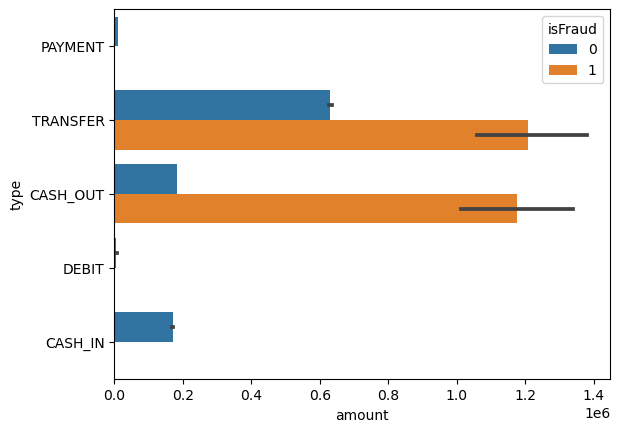

In [21]:
sns.barplot(x='amount',y='type',hue='isFraud',data=data);
plt.show()

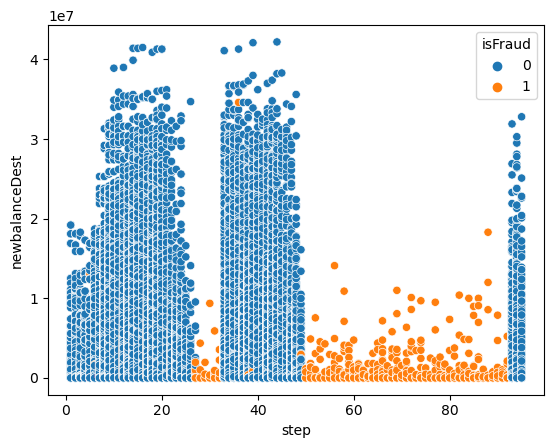

In [22]:
sns.scatterplot(x='step',y='newbalanceDest',hue='isFraud', data=data);
plt.show()

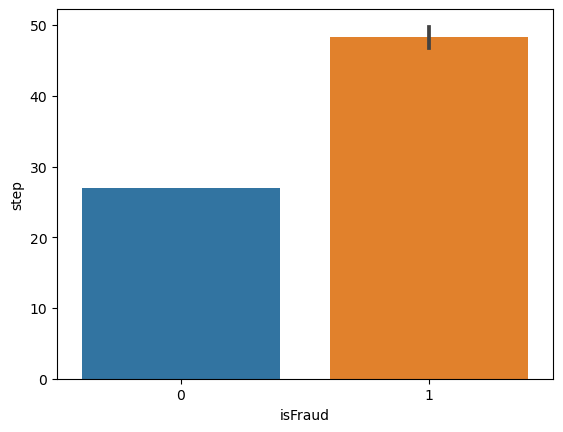

In [23]:
sns.barplot(x='isFraud',y='step',data=data);
plt.show()

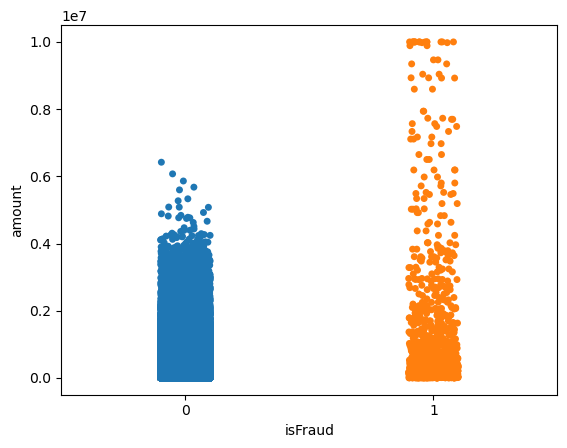

In [24]:
sns.stripplot(x=data.isFraud, y=data.amount);
plt.show()

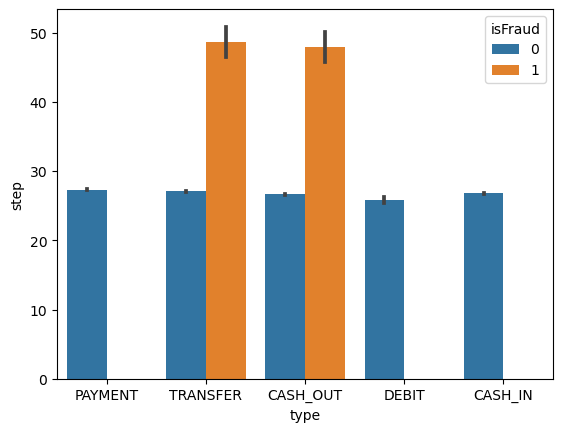

In [25]:
sns.barplot(x='type',y='step',hue='isFraud', data=data);
plt.show()

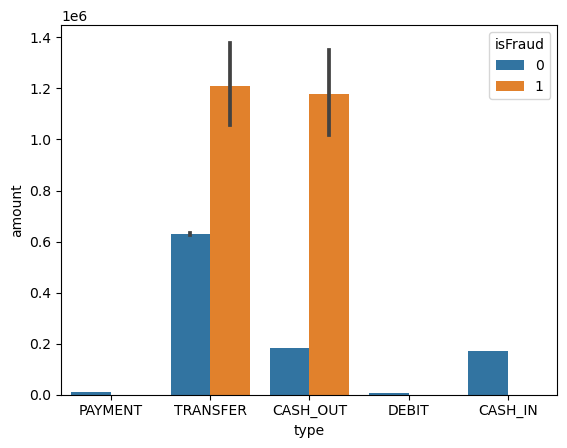

In [26]:
sns.barplot(x='type',y='amount',hue='isFraud', data=data);
plt.show()

## Findings
After performing EDA the following trends were establised.
Transactions that take longer time (usually above 30 hours) and are paid for by transfer or cash-out show higher tendencies to be fraudulent.
Transactions above 600,000 pounds carried out by transfer or cash_out are more likely to be fraudulent.

### Feature Engineering

In [27]:
# Distinguishing numerical and categorical variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


The features 'type', 'nameOrig', and 'nameDest' are categorical variables and are to be converted to numerical variables before deploying machine learning models. However, from the EDA carried out, 'nameOrig' and 'nameDest' are not strong influencers of the label 'isFraud', hence, it is better to drop them.  

In [28]:
data = data.drop(columns=['nameOrig','nameDest'], axis=1)

In [29]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [30]:
#Encoding the feature 'tye' using one hot encoding
data = pd.get_dummies(data)

In [32]:
data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,479803.00,347245.65,484329.37,616886.72,0,0,1,0,0,0
1048571,95,9917.36,90545.00,80627.64,0.00,0.00,0,0,0,0,1,0
1048572,95,14140.05,20545.00,6404.95,0.00,0.00,0,0,0,0,1,0
1048573,95,10020.05,90605.00,80584.95,0.00,0.00,0,0,0,0,1,0


In [33]:
# instantiating and separating the target variable (label)
from sklearn import preprocessing

insta = preprocessing.LabelEncoder()
insta.fit(data['isFraud'])
data['isFraud'] = insta.transform(data['isFraud'])

In [34]:
target = data['isFraud']
data = data.drop(columns=['isFraud'], axis=1)

In [35]:
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [36]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data

array([[-1.6620219 , -0.56173807, -0.23685497, ..., -0.08302207,
         1.40112074, -0.30032736],
       [-1.6620219 , -0.59184049, -0.28695576, ..., -0.08302207,
         1.40112074, -0.30032736],
       [-1.6620219 , -0.59819391, -0.29404519, ..., -0.08302207,
        -0.71371437,  3.32969997],
       ...,
       [ 4.35465419, -0.54550648, -0.28719266, ..., -0.08302207,
         1.40112074, -0.30032736],
       [ 4.35465419, -0.56105712, -0.26361732, ..., -0.08302207,
         1.40112074, -0.30032736],
       [ 4.35465419, -0.55565977, -0.26698909, ..., -0.08302207,
         1.40112074, -0.30032736]])

### Training and Testing the dataset

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
#using 70% of the data for training and 30% of the data for testing
X_train, x_test, y_train, y_test = train_test_split(data,target,test_size=0.3,random_state=0)
print(X_train.shape)
print(x_test.shape)

(734002, 11)
(314573, 11)


### Deploying Machine Learning Models
The folowing models were deployed and their performances evaluated to pick the best performer for final prediction;

Logistic Regression

Naive Bayes

Decision Tree

Random Forest

K-nearest-neigbors

In [39]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [40]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
prediction = clf.predict(x_test)

In [42]:
from sklearn.metrics import roc_auc_score

In [43]:
score = roc_auc_score(y_test,prediction)
score

0.6486422840865306

In [44]:
#Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

In [45]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [46]:
nb_pred = nb.predict(x_test)

In [47]:
score2 = roc_auc_score(y_test,nb_pred)
score2

0.7829180504333253

In [48]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

In [49]:
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
dc_pred = dc.predict(x_test)

In [51]:
score3 = roc_auc_score(y_test,dc_pred)
score3

0.9097921655107246

In [52]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
rf_pred = rf.predict(x_test)

In [55]:
score4 = roc_auc_score(y_test,rf_pred)
score4

0.8963868495532192

In [56]:
# K-Nearest-Neighbor model
from sklearn.neighbors import KNeighborsClassifier

In [57]:
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [58]:
kn_pred = kn.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [59]:
score5 = roc_auc_score(y_test,rf_pred)
score5

0.8963868495532192

The Decision Tree Model with a score of 90.8% performed better amongst all 5 models deployed. This indicates that the Decision Tree model has better capabilities of distinguishing between all the positives and the negative class points in this particular case.

### Using the best model (Decision Tree) to make predict an example of a transaction.
We can create an example of a transaction and use the model to determine if the transaction is likely to be fraudulent or not.
we can achieve this by passing all the information of the transaction in a list following the order of the last data head printed, and apply the model to give the label as an output.

In [60]:
transaction = [1,181,181,0,21182,0,0,1,0,0,0]
prediction = dc.predict([transaction])
prediction

array([1], dtype=int64)

This prediction is a true positive.

The business should pay closer to True Positives scenario. As they are more likely to be fraudulent transactions as indicated in the historical data (the last time such transaction happened, they turned out fraudulent).
However, false postives should also be closed monitored and further investigated as they could be underlying characteristics of such transactions that could make them fraudulent, hence, the reason the model is flagging them to be potentially fraudulent.